In [4]:
import pandas as pd
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt
from config import fontsize

In [5]:
plt.rcParams["legend.fontsize"] = 'large'
plt.rcParams["font.family"] = 'Times New Roman'

In [6]:
bands = [pd.read_csv(f"bands/能带示例{i}.csv") for i in range(1, 4)]

In [7]:
bands[2].频率 = bands[2].频率 * 0.9

In [8]:
def split_band_lines(band, bs=21):
    x = band.X.to_list()
    y = band.频率.to_list()

    x_groups = [x[i: i + bs] for i in range(0, len(x), bs)][:5]
    y_groups = [y[i: i + bs] for i in range(0, len(y), bs)][:5]

    return x_groups, y_groups

In [9]:
def interpolate_band(x, y):
    interpolators = [BarycentricInterpolator(xi, yi) for xi, yi in zip(x, y)]
    x_new = np.linspace(0, max(x), 1000)
    y_new = [interpolator(x_new) for interpolator in interpolators]
    return x_new, y_new

In [28]:
def plot_band(band, name="0", with_labels=False):
    fig, ax = plt.subplots(figsize=(1.5, 4))
    x, y = split_band_lines(band)
    x_new, y_new = interpolate_band(x, y)
    color_list = ["#2E54A1", "#2E54A1", "#249087", "#249087", "#FF0000", ]
    if with_labels:
        ax.set_ylabel('Frequency (Hz)', fontsize=fontsize)
    else:
        ax.set_ylabel(' ', fontsize=fontsize)
    for i, yi in enumerate(y_new):
        ax.plot(x_new, yi, linestyle='-', color=color_list[i])
    ax.set_xlim(0, 1.4)
    ax.set_ylim(0, 6500)
    ax.set_yticks([0, 6500])
    # ax.xaxis.set_visible(False)
    ax.set_xticks([])
    # ax.yaxis.set_visible(False)
    ax.text(1, -0.052, "X", ha='right', va='center', transform=ax.transAxes, fontsize=fontsize)
    ax.set_xlabel('Γ', loc="left", fontsize=fontsize)

    ax.grid(False)
    plt.tight_layout()
    plt.savefig(f"figures/fig2a_band{name}.svg")
    plt.show()
    

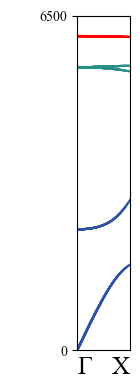

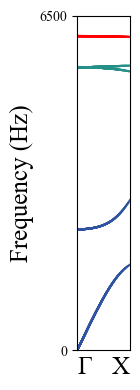

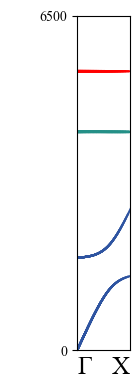

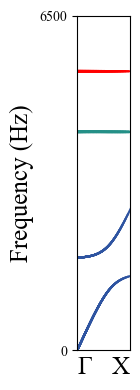

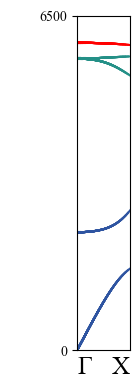

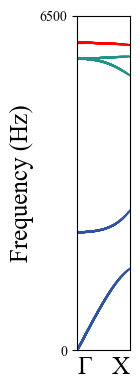

In [29]:
for i, band in enumerate(bands):
    plot_band(band, f"{i+1}")
    plot_band(band, f"{i+1}_label", with_labels=True)